In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

#from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal2.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,29.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,81.46,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,73.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.00,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,20.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.00,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [8]:
X.shape

(2580, 79)

In [9]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

Learning rate set to 0.04591
0:	learn: 72463.6559116	total: 65.7ms	remaining: 1m 5s
1:	learn: 70206.8142921	total: 71.2ms	remaining: 35.5s
2:	learn: 68044.2993336	total: 76.6ms	remaining: 25.4s
3:	learn: 65981.1549022	total: 82.9ms	remaining: 20.6s
4:	learn: 64124.5481881	total: 90ms	remaining: 17.9s
5:	learn: 62348.1983622	total: 94.6ms	remaining: 15.7s
6:	learn: 60469.7109052	total: 99.7ms	remaining: 14.1s
7:	learn: 58852.8594928	total: 109ms	remaining: 13.5s
8:	learn: 57287.5133770	total: 113ms	remaining: 12.5s
9:	learn: 55749.6880323	total: 120ms	remaining: 11.9s
10:	learn: 54211.8428973	total: 125ms	remaining: 11.2s
11:	learn: 52672.3654536	total: 129ms	remaining: 10.6s
12:	learn: 51135.8736883	total: 140ms	remaining: 10.6s
13:	learn: 49802.2234875	total: 143ms	remaining: 10.1s
14:	learn: 48613.3133647	total: 148ms	remaining: 9.72s
15:	learn: 47386.7237193	total: 152ms	remaining: 9.33s
16:	learn: 46216.1521236	total: 159ms	remaining: 9.19s
17:	learn: 45070.2462522	total: 163ms	rem

Learning rate set to 0.04591
0:	learn: 73653.6871342	total: 62.5ms	remaining: 1m 2s
1:	learn: 71462.1135838	total: 67.1ms	remaining: 33.5s
2:	learn: 69215.5846165	total: 71.9ms	remaining: 23.9s
3:	learn: 67148.3181218	total: 77.3ms	remaining: 19.3s
4:	learn: 65249.6223891	total: 84.5ms	remaining: 16.8s
5:	learn: 63367.8335148	total: 89.1ms	remaining: 14.8s
6:	learn: 61570.3898900	total: 96.5ms	remaining: 13.7s
7:	learn: 59894.0611095	total: 104ms	remaining: 12.8s
8:	learn: 58244.0893900	total: 109ms	remaining: 12s
9:	learn: 56850.6434878	total: 116ms	remaining: 11.4s
10:	learn: 55272.1484692	total: 123ms	remaining: 11s
11:	learn: 53749.4093764	total: 128ms	remaining: 10.5s
12:	learn: 52263.8661947	total: 133ms	remaining: 10.1s
13:	learn: 50981.3306782	total: 141ms	remaining: 9.91s
14:	learn: 49649.8618921	total: 146ms	remaining: 9.61s
15:	learn: 48470.8100673	total: 152ms	remaining: 9.33s
16:	learn: 47354.3700599	total: 157ms	remaining: 9.08s
17:	learn: 46178.8200298	total: 164ms	remai

148:	learn: 16603.3519583	total: 949ms	remaining: 5.42s
149:	learn: 16570.0075137	total: 954ms	remaining: 5.4s
150:	learn: 16556.7542210	total: 959ms	remaining: 5.39s
151:	learn: 16528.9441733	total: 969ms	remaining: 5.41s
152:	learn: 16470.2492589	total: 974ms	remaining: 5.39s
153:	learn: 16415.5249761	total: 981ms	remaining: 5.39s
154:	learn: 16360.0251362	total: 985ms	remaining: 5.37s
155:	learn: 16333.9527447	total: 990ms	remaining: 5.35s
156:	learn: 16298.9616432	total: 994ms	remaining: 5.34s
157:	learn: 16272.4640892	total: 998ms	remaining: 5.32s
158:	learn: 16236.0558592	total: 1.01s	remaining: 5.34s
159:	learn: 16204.2843858	total: 1.01s	remaining: 5.32s
160:	learn: 16160.1005741	total: 1.02s	remaining: 5.32s
161:	learn: 16109.8788947	total: 1.03s	remaining: 5.32s
162:	learn: 16074.2067766	total: 1.03s	remaining: 5.31s
163:	learn: 16054.4428385	total: 1.04s	remaining: 5.29s
164:	learn: 16016.2421323	total: 1.04s	remaining: 5.27s
165:	learn: 15967.3314473	total: 1.04s	remaining:

166:	learn: 16045.4385179	total: 1.15s	remaining: 5.76s
167:	learn: 15989.3664920	total: 1.17s	remaining: 5.77s
168:	learn: 15968.0145272	total: 1.17s	remaining: 5.77s
169:	learn: 15942.4824759	total: 1.18s	remaining: 5.77s
170:	learn: 15901.6331272	total: 1.19s	remaining: 5.75s
171:	learn: 15876.5685529	total: 1.19s	remaining: 5.73s
172:	learn: 15844.3679293	total: 1.19s	remaining: 5.71s
173:	learn: 15797.9689322	total: 1.2s	remaining: 5.69s
174:	learn: 15766.2202684	total: 1.2s	remaining: 5.67s
175:	learn: 15739.3351216	total: 1.21s	remaining: 5.64s
176:	learn: 15725.9082651	total: 1.21s	remaining: 5.62s
177:	learn: 15698.2398431	total: 1.23s	remaining: 5.7s
178:	learn: 15673.3736574	total: 1.24s	remaining: 5.67s
179:	learn: 15645.1757753	total: 1.24s	remaining: 5.65s
180:	learn: 15614.1238678	total: 1.24s	remaining: 5.63s
181:	learn: 15585.4939154	total: 1.25s	remaining: 5.62s
182:	learn: 15555.8606859	total: 1.27s	remaining: 5.67s
183:	learn: 15528.9010539	total: 1.28s	remaining: 5

295:	learn: 12630.0837586	total: 1.74s	remaining: 4.14s
296:	learn: 12611.1360565	total: 1.75s	remaining: 4.13s
297:	learn: 12588.9383483	total: 1.75s	remaining: 4.12s
298:	learn: 12566.6542012	total: 1.75s	remaining: 4.11s
299:	learn: 12558.2797105	total: 1.76s	remaining: 4.11s
300:	learn: 12530.4251050	total: 1.77s	remaining: 4.12s
301:	learn: 12498.2746062	total: 1.78s	remaining: 4.12s
302:	learn: 12473.6367329	total: 1.78s	remaining: 4.11s
303:	learn: 12453.4767503	total: 1.79s	remaining: 4.09s
304:	learn: 12441.3088508	total: 1.79s	remaining: 4.08s
305:	learn: 12418.9517971	total: 1.8s	remaining: 4.08s
306:	learn: 12405.5208178	total: 1.8s	remaining: 4.07s
307:	learn: 12386.9480686	total: 1.81s	remaining: 4.06s
308:	learn: 12380.5282287	total: 1.81s	remaining: 4.05s
309:	learn: 12357.6888447	total: 1.82s	remaining: 4.04s
310:	learn: 12351.3508018	total: 1.83s	remaining: 4.05s
311:	learn: 12341.6841148	total: 1.84s	remaining: 4.05s
312:	learn: 12322.2521978	total: 1.84s	remaining: 

296:	learn: 12841.9090414	total: 1.93s	remaining: 4.57s
297:	learn: 12824.6358131	total: 1.94s	remaining: 4.56s
298:	learn: 12806.2003853	total: 1.94s	remaining: 4.54s
299:	learn: 12792.5471235	total: 1.94s	remaining: 4.53s
300:	learn: 12770.8500909	total: 1.95s	remaining: 4.53s
301:	learn: 12752.0013376	total: 1.95s	remaining: 4.51s
302:	learn: 12733.3090540	total: 1.96s	remaining: 4.5s
303:	learn: 12711.0758993	total: 1.96s	remaining: 4.49s
304:	learn: 12689.2182594	total: 1.97s	remaining: 4.49s
305:	learn: 12671.7473916	total: 1.98s	remaining: 4.48s
306:	learn: 12656.8035117	total: 1.98s	remaining: 4.48s
307:	learn: 12647.8517599	total: 1.99s	remaining: 4.48s
308:	learn: 12631.6739003	total: 2s	remaining: 4.47s
309:	learn: 12612.5040984	total: 2s	remaining: 4.46s
310:	learn: 12586.5909084	total: 2.02s	remaining: 4.47s
311:	learn: 12563.2283078	total: 2.03s	remaining: 4.47s
312:	learn: 12548.5837327	total: 2.04s	remaining: 4.47s
313:	learn: 12542.7308618	total: 2.05s	remaining: 4.48s

442:	learn: 10400.4477768	total: 2.62s	remaining: 3.29s
443:	learn: 10390.4207809	total: 2.62s	remaining: 3.29s
444:	learn: 10376.5517633	total: 2.63s	remaining: 3.28s
445:	learn: 10366.9063853	total: 2.64s	remaining: 3.27s
446:	learn: 10365.1918244	total: 2.64s	remaining: 3.27s
447:	learn: 10353.1022580	total: 2.64s	remaining: 3.26s
448:	learn: 10348.2576376	total: 2.65s	remaining: 3.25s
449:	learn: 10334.5216322	total: 2.65s	remaining: 3.24s
450:	learn: 10321.7562804	total: 2.66s	remaining: 3.23s
451:	learn: 10302.6447378	total: 2.67s	remaining: 3.23s
452:	learn: 10292.3998785	total: 2.68s	remaining: 3.23s
453:	learn: 10279.4766105	total: 2.68s	remaining: 3.22s
454:	learn: 10267.3171260	total: 2.69s	remaining: 3.22s
455:	learn: 10247.2653832	total: 2.69s	remaining: 3.21s
456:	learn: 10239.7837690	total: 2.7s	remaining: 3.21s
457:	learn: 10220.8927579	total: 2.7s	remaining: 3.2s
458:	learn: 10207.8329572	total: 2.71s	remaining: 3.19s
459:	learn: 10199.0559356	total: 2.72s	remaining: 3

443:	learn: 10489.5417443	total: 2.81s	remaining: 3.52s
444:	learn: 10481.0082456	total: 2.82s	remaining: 3.52s
445:	learn: 10471.9719033	total: 2.83s	remaining: 3.52s
446:	learn: 10469.3599558	total: 2.85s	remaining: 3.53s
447:	learn: 10459.8263458	total: 2.86s	remaining: 3.52s
448:	learn: 10450.7291720	total: 2.86s	remaining: 3.51s
449:	learn: 10432.2719653	total: 2.87s	remaining: 3.5s
450:	learn: 10420.8331175	total: 2.87s	remaining: 3.5s
451:	learn: 10406.1419364	total: 2.88s	remaining: 3.49s
452:	learn: 10398.4463882	total: 2.88s	remaining: 3.48s
453:	learn: 10382.8089114	total: 2.88s	remaining: 3.47s
454:	learn: 10377.6156350	total: 2.89s	remaining: 3.46s
455:	learn: 10368.3860159	total: 2.9s	remaining: 3.46s
456:	learn: 10356.6217599	total: 2.91s	remaining: 3.45s
457:	learn: 10344.7251974	total: 2.91s	remaining: 3.45s
458:	learn: 10336.0165355	total: 2.92s	remaining: 3.44s
459:	learn: 10332.1146563	total: 2.93s	remaining: 3.44s
460:	learn: 10323.6339601	total: 2.93s	remaining: 3

591:	learn: 8885.0520108	total: 3.55s	remaining: 2.44s
592:	learn: 8874.8345714	total: 3.55s	remaining: 2.44s
593:	learn: 8865.0412811	total: 3.55s	remaining: 2.43s
594:	learn: 8859.3209526	total: 3.56s	remaining: 2.42s
595:	learn: 8851.7910224	total: 3.57s	remaining: 2.42s
596:	learn: 8848.8798040	total: 3.57s	remaining: 2.41s
597:	learn: 8837.2180473	total: 3.58s	remaining: 2.41s
598:	learn: 8831.0047178	total: 3.59s	remaining: 2.4s
599:	learn: 8822.0130624	total: 3.6s	remaining: 2.4s
600:	learn: 8812.3140932	total: 3.6s	remaining: 2.39s
601:	learn: 8797.1597177	total: 3.6s	remaining: 2.38s
602:	learn: 8783.2714257	total: 3.61s	remaining: 2.38s
603:	learn: 8779.9510986	total: 3.61s	remaining: 2.37s
604:	learn: 8760.1952356	total: 3.62s	remaining: 2.36s
605:	learn: 8756.0540793	total: 3.63s	remaining: 2.36s
606:	learn: 8739.5506100	total: 3.63s	remaining: 2.35s
607:	learn: 8723.9308109	total: 3.64s	remaining: 2.35s
608:	learn: 8716.9125794	total: 3.65s	remaining: 2.34s
609:	learn: 871

592:	learn: 8957.4243979	total: 3.88s	remaining: 2.66s
593:	learn: 8947.1653715	total: 3.89s	remaining: 2.66s
594:	learn: 8938.4130783	total: 3.89s	remaining: 2.65s
595:	learn: 8925.9291123	total: 3.9s	remaining: 2.65s
596:	learn: 8919.9411409	total: 3.91s	remaining: 2.64s
597:	learn: 8910.2666792	total: 3.92s	remaining: 2.63s
598:	learn: 8895.5066289	total: 3.93s	remaining: 2.63s
599:	learn: 8883.5507707	total: 3.93s	remaining: 2.62s
600:	learn: 8873.4288997	total: 3.94s	remaining: 2.62s
601:	learn: 8862.3441484	total: 3.94s	remaining: 2.61s
602:	learn: 8852.4188280	total: 3.95s	remaining: 2.6s
603:	learn: 8841.8418711	total: 3.95s	remaining: 2.59s
604:	learn: 8833.9485105	total: 3.96s	remaining: 2.58s
605:	learn: 8826.7221501	total: 3.97s	remaining: 2.58s
606:	learn: 8821.4872086	total: 3.98s	remaining: 2.57s
607:	learn: 8813.4525922	total: 3.98s	remaining: 2.57s
608:	learn: 8799.2516456	total: 3.99s	remaining: 2.56s
609:	learn: 8795.5427377	total: 4s	remaining: 2.56s
610:	learn: 878

741:	learn: 7741.5030651	total: 4.48s	remaining: 1.56s
742:	learn: 7734.0061203	total: 4.49s	remaining: 1.55s
743:	learn: 7730.7581488	total: 4.5s	remaining: 1.55s
744:	learn: 7726.8645532	total: 4.5s	remaining: 1.54s
745:	learn: 7715.4583891	total: 4.5s	remaining: 1.53s
746:	learn: 7709.7347392	total: 4.51s	remaining: 1.53s
747:	learn: 7702.2973127	total: 4.52s	remaining: 1.52s
748:	learn: 7693.4789486	total: 4.53s	remaining: 1.52s
749:	learn: 7685.6796482	total: 4.54s	remaining: 1.51s
750:	learn: 7680.1608125	total: 4.55s	remaining: 1.51s
751:	learn: 7678.6970540	total: 4.55s	remaining: 1.5s
752:	learn: 7678.2323107	total: 4.55s	remaining: 1.49s
753:	learn: 7669.8721203	total: 4.56s	remaining: 1.49s
754:	learn: 7659.8267961	total: 4.57s	remaining: 1.48s
755:	learn: 7649.7544401	total: 4.57s	remaining: 1.48s
756:	learn: 7640.0278898	total: 4.58s	remaining: 1.47s
757:	learn: 7630.7037315	total: 4.58s	remaining: 1.46s
758:	learn: 7630.1498204	total: 4.59s	remaining: 1.46s
759:	learn: 76

892:	learn: 6708.2927313	total: 5.74s	remaining: 688ms
893:	learn: 6703.9016885	total: 5.75s	remaining: 681ms
894:	learn: 6700.6420771	total: 5.75s	remaining: 675ms
895:	learn: 6696.1577792	total: 5.76s	remaining: 669ms
896:	learn: 6688.0032770	total: 5.77s	remaining: 663ms
897:	learn: 6682.3208525	total: 5.78s	remaining: 656ms
898:	learn: 6677.5251928	total: 5.78s	remaining: 649ms
899:	learn: 6668.4818562	total: 5.78s	remaining: 643ms
900:	learn: 6661.7356093	total: 5.79s	remaining: 636ms
901:	learn: 6657.1443896	total: 5.79s	remaining: 629ms
902:	learn: 6650.3979437	total: 5.79s	remaining: 623ms
903:	learn: 6644.1984633	total: 5.8s	remaining: 616ms
904:	learn: 6641.9788115	total: 5.81s	remaining: 610ms
905:	learn: 6638.3329455	total: 5.82s	remaining: 604ms
906:	learn: 6631.5066341	total: 5.83s	remaining: 598ms
907:	learn: 6625.7982905	total: 5.84s	remaining: 592ms
908:	learn: 6624.7802580	total: 5.85s	remaining: 586ms
909:	learn: 6617.0651736	total: 5.86s	remaining: 579ms
910:	learn:

41:	learn: 29572.4997003	total: 189ms	remaining: 4.3s
42:	learn: 29197.6113558	total: 193ms	remaining: 4.29s
43:	learn: 28786.7845169	total: 199ms	remaining: 4.32s
44:	learn: 28427.8631749	total: 202ms	remaining: 4.28s
45:	learn: 28123.6109523	total: 208ms	remaining: 4.31s
46:	learn: 27818.2763179	total: 212ms	remaining: 4.29s
47:	learn: 27475.0000960	total: 214ms	remaining: 4.24s
48:	learn: 27154.8403126	total: 216ms	remaining: 4.2s
49:	learn: 26835.9160179	total: 220ms	remaining: 4.17s
50:	learn: 26548.4769542	total: 223ms	remaining: 4.14s
51:	learn: 26251.7255677	total: 228ms	remaining: 4.16s
52:	learn: 25996.7487278	total: 235ms	remaining: 4.2s
53:	learn: 25776.8371431	total: 240ms	remaining: 4.2s
54:	learn: 25512.4375775	total: 245ms	remaining: 4.2s
55:	learn: 25294.5612481	total: 248ms	remaining: 4.17s
56:	learn: 25070.6699455	total: 250ms	remaining: 4.14s
57:	learn: 24846.0935938	total: 253ms	remaining: 4.11s
58:	learn: 24641.7069785	total: 260ms	remaining: 4.14s
59:	learn: 2440

892:	learn: 6862.1588123	total: 5.67s	remaining: 679ms
893:	learn: 6853.8472306	total: 5.67s	remaining: 673ms
894:	learn: 6848.4256605	total: 5.68s	remaining: 666ms
895:	learn: 6843.8561306	total: 5.68s	remaining: 660ms
896:	learn: 6834.6141433	total: 5.69s	remaining: 653ms
897:	learn: 6829.9279886	total: 5.69s	remaining: 647ms
898:	learn: 6823.6490975	total: 5.7s	remaining: 640ms
899:	learn: 6814.6033359	total: 5.7s	remaining: 633ms
900:	learn: 6810.0942912	total: 5.7s	remaining: 627ms
901:	learn: 6801.6306738	total: 5.71s	remaining: 620ms
902:	learn: 6796.8959069	total: 5.71s	remaining: 613ms
903:	learn: 6795.9255828	total: 5.71s	remaining: 607ms
904:	learn: 6791.0140855	total: 5.72s	remaining: 601ms
905:	learn: 6787.1620247	total: 5.73s	remaining: 595ms
906:	learn: 6782.5882570	total: 5.74s	remaining: 588ms
907:	learn: 6773.7932293	total: 5.74s	remaining: 582ms
908:	learn: 6767.9005128	total: 5.75s	remaining: 575ms
909:	learn: 6763.4254191	total: 5.75s	remaining: 569ms
910:	learn: 6

189:	learn: 15460.1410668	total: 820ms	remaining: 3.49s
190:	learn: 15437.7387821	total: 822ms	remaining: 3.48s
191:	learn: 15406.1889438	total: 827ms	remaining: 3.48s
192:	learn: 15371.7244189	total: 833ms	remaining: 3.48s
193:	learn: 15350.1294914	total: 836ms	remaining: 3.47s
194:	learn: 15323.2643350	total: 838ms	remaining: 3.46s
195:	learn: 15301.2610810	total: 841ms	remaining: 3.45s
196:	learn: 15273.0308800	total: 843ms	remaining: 3.44s
197:	learn: 15232.8587383	total: 846ms	remaining: 3.43s
198:	learn: 15199.2856933	total: 852ms	remaining: 3.43s
199:	learn: 15170.9288108	total: 859ms	remaining: 3.44s
200:	learn: 15134.6506558	total: 862ms	remaining: 3.42s
201:	learn: 15099.4448772	total: 865ms	remaining: 3.42s
202:	learn: 15076.1767269	total: 871ms	remaining: 3.42s
203:	learn: 15036.2662142	total: 874ms	remaining: 3.41s
204:	learn: 15018.2860796	total: 879ms	remaining: 3.41s
205:	learn: 15003.0202579	total: 885ms	remaining: 3.41s
206:	learn: 14980.5595232	total: 888ms	remaining

336:	learn: 12160.6357855	total: 1.39s	remaining: 2.73s
337:	learn: 12154.5669026	total: 1.39s	remaining: 2.73s
338:	learn: 12139.1699865	total: 1.39s	remaining: 2.72s
339:	learn: 12111.4154447	total: 1.4s	remaining: 2.72s
340:	learn: 12097.6171191	total: 1.4s	remaining: 2.71s
341:	learn: 12073.6046407	total: 1.41s	remaining: 2.71s
342:	learn: 12052.9276191	total: 1.41s	remaining: 2.7s
343:	learn: 12035.0730987	total: 1.42s	remaining: 2.7s
344:	learn: 12027.5628437	total: 1.42s	remaining: 2.7s
345:	learn: 12011.3560795	total: 1.43s	remaining: 2.7s
346:	learn: 11987.6099408	total: 1.43s	remaining: 2.7s
347:	learn: 11968.4527496	total: 1.44s	remaining: 2.69s
348:	learn: 11955.6762597	total: 1.44s	remaining: 2.69s
349:	learn: 11936.8415814	total: 1.45s	remaining: 2.69s
350:	learn: 11933.1206302	total: 1.45s	remaining: 2.68s
351:	learn: 11927.4935803	total: 1.46s	remaining: 2.68s
352:	learn: 11921.0431632	total: 1.46s	remaining: 2.67s
353:	learn: 11915.9245073	total: 1.46s	remaining: 2.67s

40:	learn: 28693.0020775	total: 311ms	remaining: 7.28s
41:	learn: 28298.2972092	total: 320ms	remaining: 7.31s
42:	learn: 27907.1744266	total: 332ms	remaining: 7.4s
43:	learn: 27537.5822526	total: 345ms	remaining: 7.5s
44:	learn: 27181.4300845	total: 358ms	remaining: 7.59s
45:	learn: 26861.7390265	total: 363ms	remaining: 7.53s
46:	learn: 26522.1113390	total: 374ms	remaining: 7.58s
47:	learn: 26240.4515182	total: 381ms	remaining: 7.56s
48:	learn: 25949.6428072	total: 395ms	remaining: 7.66s
49:	learn: 25715.9326387	total: 404ms	remaining: 7.67s
50:	learn: 25416.5541921	total: 413ms	remaining: 7.69s
51:	learn: 25128.5911343	total: 425ms	remaining: 7.75s
52:	learn: 24871.1642151	total: 435ms	remaining: 7.77s
53:	learn: 24609.8030220	total: 439ms	remaining: 7.69s
54:	learn: 24417.4648729	total: 445ms	remaining: 7.65s
55:	learn: 24199.4730209	total: 451ms	remaining: 7.6s
56:	learn: 23969.3179408	total: 458ms	remaining: 7.57s
57:	learn: 23717.5753043	total: 465ms	remaining: 7.55s
58:	learn: 23

483:	learn: 9995.1816922	total: 2s	remaining: 2.13s
484:	learn: 9979.2626271	total: 2s	remaining: 2.13s
485:	learn: 9969.6598225	total: 2s	remaining: 2.12s
486:	learn: 9957.3404756	total: 2.01s	remaining: 2.11s
487:	learn: 9948.0664185	total: 2.01s	remaining: 2.11s
488:	learn: 9931.8179067	total: 2.02s	remaining: 2.11s
489:	learn: 9920.5827906	total: 2.02s	remaining: 2.1s
490:	learn: 9907.3523401	total: 2.03s	remaining: 2.1s
491:	learn: 9890.9183589	total: 2.03s	remaining: 2.1s
492:	learn: 9884.7390483	total: 2.03s	remaining: 2.09s
493:	learn: 9869.0303937	total: 2.04s	remaining: 2.09s
494:	learn: 9862.6432348	total: 2.04s	remaining: 2.09s
495:	learn: 9861.8252492	total: 2.05s	remaining: 2.08s
496:	learn: 9853.0036608	total: 2.05s	remaining: 2.08s
497:	learn: 9837.3007325	total: 2.05s	remaining: 2.07s
498:	learn: 9824.5067610	total: 2.06s	remaining: 2.07s
499:	learn: 9813.9078548	total: 2.06s	remaining: 2.06s
500:	learn: 9801.5299218	total: 2.07s	remaining: 2.06s
501:	learn: 9790.25727

633:	learn: 8518.5492963	total: 2.63s	remaining: 1.52s
634:	learn: 8510.1961535	total: 2.63s	remaining: 1.51s
635:	learn: 8504.0264194	total: 2.64s	remaining: 1.51s
636:	learn: 8494.3661274	total: 2.64s	remaining: 1.5s
637:	learn: 8479.1456328	total: 2.65s	remaining: 1.5s
638:	learn: 8467.8938801	total: 2.65s	remaining: 1.5s
639:	learn: 8463.0811217	total: 2.65s	remaining: 1.49s
640:	learn: 8451.3092803	total: 2.65s	remaining: 1.49s
641:	learn: 8443.4369821	total: 2.66s	remaining: 1.48s
642:	learn: 8436.6644372	total: 2.66s	remaining: 1.48s
643:	learn: 8426.9921778	total: 2.67s	remaining: 1.47s
644:	learn: 8417.7267846	total: 2.67s	remaining: 1.47s
645:	learn: 8410.5295760	total: 2.67s	remaining: 1.46s
646:	learn: 8408.2533047	total: 2.68s	remaining: 1.46s
647:	learn: 8399.5043715	total: 2.68s	remaining: 1.46s
648:	learn: 8393.4926460	total: 2.69s	remaining: 1.45s
649:	learn: 8383.7486501	total: 2.69s	remaining: 1.45s
650:	learn: 8369.2406663	total: 2.7s	remaining: 1.45s
651:	learn: 83

188:	learn: 15035.6448900	total: 1.72s	remaining: 7.4s
189:	learn: 15009.9359705	total: 1.74s	remaining: 7.4s
190:	learn: 14971.5681307	total: 1.74s	remaining: 7.38s
191:	learn: 14942.8431211	total: 1.75s	remaining: 7.37s
192:	learn: 14909.7951487	total: 1.77s	remaining: 7.39s
193:	learn: 14874.7877042	total: 1.77s	remaining: 7.37s
194:	learn: 14842.5590539	total: 1.78s	remaining: 7.36s
195:	learn: 14813.8677597	total: 1.79s	remaining: 7.36s
196:	learn: 14794.4823933	total: 1.81s	remaining: 7.36s
197:	learn: 14767.9026609	total: 1.81s	remaining: 7.35s
198:	learn: 14751.6448386	total: 1.82s	remaining: 7.34s
199:	learn: 14729.2263984	total: 1.83s	remaining: 7.33s
200:	learn: 14676.5442820	total: 1.84s	remaining: 7.33s
201:	learn: 14647.9428724	total: 1.85s	remaining: 7.33s
202:	learn: 14614.0751996	total: 1.86s	remaining: 7.32s
203:	learn: 14583.5384311	total: 1.87s	remaining: 7.31s
204:	learn: 14540.9481670	total: 1.88s	remaining: 7.29s
205:	learn: 14505.3842466	total: 1.89s	remaining: 

336:	learn: 12161.7017373	total: 2.94s	remaining: 5.78s
337:	learn: 12147.3026006	total: 2.94s	remaining: 5.77s
338:	learn: 12145.4410846	total: 2.95s	remaining: 5.76s
339:	learn: 12120.4539916	total: 2.96s	remaining: 5.75s
340:	learn: 12103.5157352	total: 2.97s	remaining: 5.75s
341:	learn: 12101.4142110	total: 2.98s	remaining: 5.73s
342:	learn: 12083.5514453	total: 2.98s	remaining: 5.72s
343:	learn: 12054.2761294	total: 2.99s	remaining: 5.71s
344:	learn: 12046.8135257	total: 3.01s	remaining: 5.71s
345:	learn: 12026.7692495	total: 3.02s	remaining: 5.71s
346:	learn: 12020.7476742	total: 3.02s	remaining: 5.69s
347:	learn: 12010.4955968	total: 3.04s	remaining: 5.7s
348:	learn: 11986.4574536	total: 3.05s	remaining: 5.69s
349:	learn: 11984.9552373	total: 3.06s	remaining: 5.68s
350:	learn: 11979.2709750	total: 3.07s	remaining: 5.68s
351:	learn: 11960.6426865	total: 3.08s	remaining: 5.67s
352:	learn: 11936.6169268	total: 3.09s	remaining: 5.66s
353:	learn: 11919.3717416	total: 3.09s	remaining:

335:	learn: 11709.9263657	total: 3.11s	remaining: 6.14s
336:	learn: 11695.7088943	total: 3.11s	remaining: 6.12s
337:	learn: 11682.5896280	total: 3.12s	remaining: 6.11s
338:	learn: 11664.4538779	total: 3.13s	remaining: 6.1s
339:	learn: 11649.6648393	total: 3.14s	remaining: 6.1s
340:	learn: 11621.3935251	total: 3.15s	remaining: 6.08s
341:	learn: 11607.1797192	total: 3.15s	remaining: 6.07s
342:	learn: 11590.2455540	total: 3.16s	remaining: 6.05s
343:	learn: 11579.8401286	total: 3.17s	remaining: 6.05s
344:	learn: 11553.2703835	total: 3.18s	remaining: 6.04s
345:	learn: 11538.7503437	total: 3.19s	remaining: 6.04s
346:	learn: 11529.4681926	total: 3.2s	remaining: 6.03s
347:	learn: 11514.4219136	total: 3.21s	remaining: 6.01s
348:	learn: 11511.7225600	total: 3.22s	remaining: 6s
349:	learn: 11489.6139605	total: 3.22s	remaining: 5.99s
350:	learn: 11475.3529167	total: 3.23s	remaining: 5.97s
351:	learn: 11457.9633284	total: 3.24s	remaining: 5.96s
352:	learn: 11442.0913731	total: 3.24s	remaining: 5.95

483:	learn: 10173.0812474	total: 4.16s	remaining: 4.43s
484:	learn: 10158.7959880	total: 4.17s	remaining: 4.43s
485:	learn: 10149.2560741	total: 4.18s	remaining: 4.42s
486:	learn: 10141.5218656	total: 4.19s	remaining: 4.41s
487:	learn: 10128.4601571	total: 4.19s	remaining: 4.4s
488:	learn: 10110.9515284	total: 4.2s	remaining: 4.39s
489:	learn: 10109.7631342	total: 4.2s	remaining: 4.38s
490:	learn: 10099.3174212	total: 4.21s	remaining: 4.36s
491:	learn: 10097.5267447	total: 4.21s	remaining: 4.35s
492:	learn: 10084.6732190	total: 4.22s	remaining: 4.34s
493:	learn: 10069.3379203	total: 4.23s	remaining: 4.33s
494:	learn: 10068.2492928	total: 4.24s	remaining: 4.32s
495:	learn: 10055.7593660	total: 4.25s	remaining: 4.32s
496:	learn: 10043.1404285	total: 4.25s	remaining: 4.31s
497:	learn: 10039.3174393	total: 4.26s	remaining: 4.3s
498:	learn: 10025.2302068	total: 4.27s	remaining: 4.29s
499:	learn: 10023.6013768	total: 4.28s	remaining: 4.28s
500:	learn: 10012.7372953	total: 4.28s	remaining: 4.

483:	learn: 9812.0678554	total: 4.33s	remaining: 4.61s
484:	learn: 9799.8402503	total: 4.34s	remaining: 4.6s
485:	learn: 9789.6724212	total: 4.34s	remaining: 4.59s
486:	learn: 9776.9320861	total: 4.35s	remaining: 4.58s
487:	learn: 9771.6759079	total: 4.36s	remaining: 4.57s
488:	learn: 9763.4805317	total: 4.37s	remaining: 4.56s
489:	learn: 9760.2094556	total: 4.37s	remaining: 4.55s
490:	learn: 9734.1099015	total: 4.38s	remaining: 4.54s
491:	learn: 9721.0729047	total: 4.38s	remaining: 4.53s
492:	learn: 9703.3394521	total: 4.39s	remaining: 4.52s
493:	learn: 9685.6260944	total: 4.41s	remaining: 4.51s
494:	learn: 9684.0272564	total: 4.42s	remaining: 4.5s
495:	learn: 9669.4542682	total: 4.42s	remaining: 4.5s
496:	learn: 9659.3664234	total: 4.43s	remaining: 4.49s
497:	learn: 9649.8879866	total: 4.44s	remaining: 4.47s
498:	learn: 9643.3250440	total: 4.45s	remaining: 4.46s
499:	learn: 9623.7020523	total: 4.46s	remaining: 4.46s
500:	learn: 9606.6694003	total: 4.46s	remaining: 4.45s
501:	learn: 9

633:	learn: 8788.3523220	total: 5.15s	remaining: 2.98s
634:	learn: 8782.0997055	total: 5.16s	remaining: 2.96s
635:	learn: 8772.7410736	total: 5.16s	remaining: 2.96s
636:	learn: 8771.8519709	total: 5.17s	remaining: 2.94s
637:	learn: 8757.1865933	total: 5.18s	remaining: 2.94s
638:	learn: 8740.8768205	total: 5.18s	remaining: 2.93s
639:	learn: 8731.4123680	total: 5.2s	remaining: 2.92s
640:	learn: 8722.7853447	total: 5.2s	remaining: 2.91s
641:	learn: 8714.8894005	total: 5.21s	remaining: 2.91s
642:	learn: 8703.0322112	total: 5.22s	remaining: 2.9s
643:	learn: 8698.7787028	total: 5.23s	remaining: 2.89s
644:	learn: 8684.4164726	total: 5.24s	remaining: 2.88s
645:	learn: 8674.8222444	total: 5.24s	remaining: 2.87s
646:	learn: 8662.0337126	total: 5.25s	remaining: 2.86s
647:	learn: 8656.8453759	total: 5.26s	remaining: 2.86s
648:	learn: 8656.0410223	total: 5.27s	remaining: 2.85s
649:	learn: 8651.6260240	total: 5.28s	remaining: 2.84s
650:	learn: 8644.0446453	total: 5.28s	remaining: 2.83s
651:	learn: 8

634:	learn: 8752.3058870	total: 5.34s	remaining: 3.07s
635:	learn: 8746.6419605	total: 5.35s	remaining: 3.06s
636:	learn: 8735.5667790	total: 5.36s	remaining: 3.05s
637:	learn: 8727.7838505	total: 5.36s	remaining: 3.04s
638:	learn: 8722.4717856	total: 5.37s	remaining: 3.04s
639:	learn: 8711.8556636	total: 5.38s	remaining: 3.02s
640:	learn: 8704.6477434	total: 5.38s	remaining: 3.02s
641:	learn: 8695.2110244	total: 5.39s	remaining: 3.01s
642:	learn: 8684.6944238	total: 5.4s	remaining: 3s
643:	learn: 8672.5702071	total: 5.41s	remaining: 2.99s
644:	learn: 8667.9971527	total: 5.42s	remaining: 2.99s
645:	learn: 8667.0933969	total: 5.44s	remaining: 2.98s
646:	learn: 8662.1465503	total: 5.45s	remaining: 2.97s
647:	learn: 8659.4076055	total: 5.46s	remaining: 2.96s
648:	learn: 8642.3348037	total: 5.47s	remaining: 2.96s
649:	learn: 8633.8159169	total: 5.47s	remaining: 2.95s
650:	learn: 8619.5633126	total: 5.48s	remaining: 2.94s
651:	learn: 8607.8465225	total: 5.49s	remaining: 2.93s
652:	learn: 85

In [10]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.922817,-12873.361683,12873.361683
1,0.894705,-12078.089008,12078.089008
2,0.936007,-12260.969764,12260.969764
3,0.929716,-12123.629333,12123.629333
4,0.949948,-11144.079503,11144.079503
5,0.935921,-12656.629072,12656.629072
6,0.939277,-11206.388759,11206.388759
7,0.929727,-11943.100554,11943.100554
8,0.947807,-11325.804651,11325.804651
9,0.888503,-13993.303130,13993.303130


In [11]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.926071,-12157.235029,12157.235029
std,0.023954,805.073480,805.073480
min,0.867974,-13993.303130,11144.079503
25%,0.922383,-12608.094096,11502.958567
50%,0.935921,-12078.089008,12078.089008
75%,0.940866,-11502.958567,12608.094096
max,0.949948,-11144.079503,13993.303130


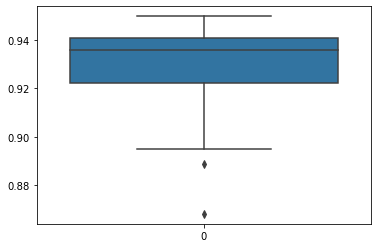

In [12]:
sns.boxplot(data=cat_df['Cat R2']);